In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
import collections
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from random import randint

#Data Preprocessing
Since the given training data set is categorical, **one-hot** encoding is required to be done. For it to be implemented successfuly, there should be all the possible values for a given attribute in the data, which is not.
As a result, we append those attributes so that the final encoding has all such attributes covered.  
Further, for columns such as *gill-attachment, gill-spacing*, there are not sufficient entries for each type specified in the description. Hence, we need to add the missing values.
Handling missing values (?=1587) by :

- removing the column itself. Not a good idea.
- Considering ? as constant. This will treat ? as another feature and proceed so no use.
- Replace ? with mode value seems to be best in this case.

#Code 

In [0]:
class KnnClassifier:

  def __init__(self):
    self.attributes=[['b','c','x','f','k','s'],
                     ['f','g','y','s'],
                     ['n','b','c','g','r','p','u','e','w','y'],
                     ['t','f'],
                     ['a','l','c','y','f','m','n','p','s'],
                     ['a','d','f','n'],
                     ['c','w','d'],
                     ['b','n'],
                     ['k','n','b','h','g','r','o','p','u','e','w','y'],
                     ['e','t'],
                     ['b','c','u','e','z','r'],
                     ['f','y','k','s'],
                     ['f','y','k','s'],
                     ['n','b','c','g','o','p','e','w','y'],
                     ['n','b','c','g','o','p','e','w','y'],
                     ['p','u'],
                     ['n','o','w','y'],
                     ['n','o','t'],
                     ['c','e','f','l','n','p','s','z'],
                     ['k','n','b','h','r','o','u','w','y'],
                     ['a','c','n','s','v','y'],
                     ['g','l','m','p','u','w','d']]
    self.distances=[]
    # self.train_attributes
    # # sum=0
    # for i in range(0,22):
    #   print(len(self.attributes[i]))
    # # print(sum)

  def calculate_distance(self,param):
    if(param==1):
        #Euclidean Distance
        for i in self.validation_attributes:
            for j in self.train_attributes:
                euclid_distance=np.sum((i-j)**2)
                self.distances.append(euclid_distance)
                
    else:
        #Manhattan Distance
        for i in self.validation_attributes:
          for j in self.train_attributes:
            manhatten_distance=np.sum(abs(i-j))
            self.distances.append(manhatten_distance)

  def predict_label(self,list_k):
    votes={}
    for i in range(len(list_k)):
        response=list_k[i][1];
        if(response in votes):
            votes[response]+=1
        else:
            votes[response]=1
    # print(votes)
    sorted_votes=sorted(votes.items(),key=lambda item: item[1])
    # print(sorted_votes)
    return sorted_votes[len(sorted_votes)-1][0]

  def train(self,trainfilepath):
    data=pd.read_csv(trainfilepath,header=None)
    data_array=data.to_numpy()
    # print(data_array)
    attributeinfo=np.delete(data_array,0,1)
    addrow=attributeinfo[0,:]
    # print(type(attributeinfo))
    label=data_array[:,0]
    #Finding count of ? values in column 11
    # print(collections.Counter(attributeinfo[:,10]))
    mode=stats.mode(attributeinfo[:,10])
    # print(mode[0][0])
    for i in range(len(attributeinfo)):
      if(attributeinfo[i,10]=='?'):
        attributeinfo[i,10]=mode[0][0]

    # print(attributeinfo)
    originallength=len(attributeinfo)
    for i in range(0,22):
      # print(i)
      # print(np.unique(attributeinfo[:,i]))
      # print(np.asarray(self.attributes[i]))
      difference=np.setdiff1d(np.asarray(self.attributes[i]),np.unique(attributeinfo[:,i]))
      # print(difference)
      if(len(difference)>0):
        for element in difference:
          addrow[i]=element
          attributeinfo=np.vstack([attributeinfo,addrow])
    
    attributeinfo_df=pd.DataFrame()
    
    # print(originallength)
    for i in range(0,22):
      attributeinfo_onehot=pd.get_dummies(attributeinfo[:,i])
      # print(attributeinfo_onehot)
      attributeinfo_df=pd.concat([attributeinfo_df,attributeinfo_onehot],axis=1)
    # print(len(attributeinfo_df))
    processed_df=attributeinfo_df.iloc[0:originallength,:]
    # print(processed_df)
    # processed_df['Label']=label
    processed_df.insert(0,'Label',label)
    # print(processed_df)
    # print(processed_df.iloc[1606,:])
    # attributeinfo_df.to_csv('q21hot.csv')
    # print(type(X))
    # print(Y)
    # Splitting data into train & validate
    msk = np.random.rand(len(processed_df)) < 0.8
    train_df = processed_df[msk]
    validation_df = processed_df[~msk]
    # print(len(processed_df))
    print(len(train_df))
    # print(train_df)
    print(len(validation_df))
    # print(validation_df)
    train_array=train_df.to_numpy()
    self.train_labels=train_array[:,0]
    self.train_attributes=train_array[:,1:]
    validation_array=validation_df.to_numpy()
    self.validation_labels=validation_array[:,0]
    self.validation_attributes=validation_array[:,1:]
    print("Distance calculation started")
    self.calculate_distance(1)
    print("Distance calculation complete")
    print(len(self.distances))
    # print(self.train_labels)
    # print(self.train_attributes[0,:])
  def predict(self,testfilepath):
    predicted_list=[]
    list_k=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1score=[]
    kvalue=[]
    cm=[]
    for k in range(2,20,1):
      for i in range(0,len(self.distances),len(self.train_attributes)):
        for j in range(i+0,i+len(self.train_attributes)):
            list_k.append((self.distances[j],self.train_labels[j%len(self.train_attributes)]))
            if(len(list_k)>k):
                list_k.sort()
                list_k=list_k[:k]
        predicted_list.append(self.predict_label(list_k))
        list_k.clear()
        # for i in range(len(predicted_list)):
          # print(self.validation_labels[i],predicted_list[i])
      accuracy.append(accuracy_score(self.validation_labels,predicted_list))
      precision.append(precision_score(self.validation_labels,predicted_list,average='micro'))
      # recall.append(recall_score(self.validation_labels,predicted_list,average='macro'))
      f1score.append(f1_score(self.validation_labels,predicted_list,average='micro'))
      # cm.append(confusion_matrix(self.validation_labels,predicted_list))
      kvalue.append(k)
      predicted_list.clear()

    print(kvalue)
    print(accuracy)
    print(precision)
    # print(recall)
    print(f1score)
    # print(cm)
    plt.plot(kvalue,accuracy)
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.show()

  def sklearn_knn(self):
    score=[]
    kv=[]
    print("Scikit lean KNN Accuracy")
    for k in range(2,20,1):
      knn=KNeighborsClassifier(n_neighbors=k)
      knn.fit(self.train_attributes,self.train_labels)
      predicted_labels=knn.predict(self.validation_attributes)
      score.append(accuracy_score(self.validation_labels,predicted_labels))
      kv.append(k)
    plt.plot(kv,score)
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.show()


  def random_guessing(self):
    guess_list=['e','p']
    predictions=[]
    for i in range(len(self.validation_attributes)):
      guess_value=randint(0,10)
      predictions.append(guess_list[guess_value%2])
    print('Accuracy score : ',accuracy_score(self.validation_labels,predictions))



  def majority_voting(self):
    pass



#Choosing K values 
1.*Euclidean Distance*  

>Steps: 
- k value range was set from 2 to 20.
- Plotted the graph for multiple values.
- accuracy was 100% till k = 9, after which it started dropping by 0.1%
- Chose k=5 for my final model.  

2.*Manhatten Distance*

>Steps:
- k value range was set from 2 to 20.
- Plotted the graph for multiple values.
- accuracy was 100% throughout.


3583
913
Distance calculation started
Distance calculation complete
3271279
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832, 0.9989047097480832]


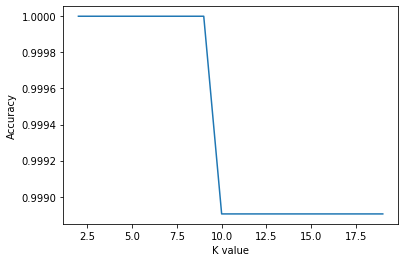

Scikit lean KNN Accuracy


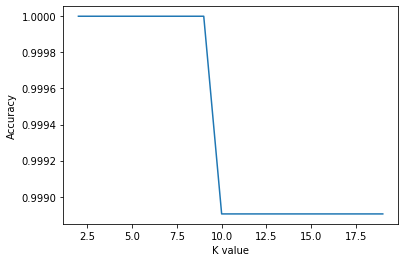

Accuracy score :  0.5104052573932092


In [0]:
filename='./Datasets/q2/train.csv'
  # data=pd.read_csv(filename)
knc=KnnClassifier()
knc.train(filename)
knc.predict(filename)
knc.sklearn_knn()
knc.random_guessing()

#Different approaches
##Scikit-learn kNN Classifier

For the same values of k, accuracy was 100% till k=10, beyond which it started dropping.

##Random Guessing

The predictions were made by merely guessing one of the possible labels.
Randint() was made use of to generate a random number which would then be reduced to mod2 level.
*Accuracy* was **51%**.